In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
from scipy.stats import mannwhitneyu as mwu

Size of gene sets.

In [3]:
gene_set_sizes=None
for dname in ['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']:
    data=pd.read_csv('../results/genesets/single/csvs/%s.csv' % dname,sep=',',header=0,index_col=0)
    data=pd.DataFrame(data['Set'].value_counts())
    data['Name']=data.index
    data['Database']=dname
    gene_set_sizes=pd.concat([gene_set_sizes,data])

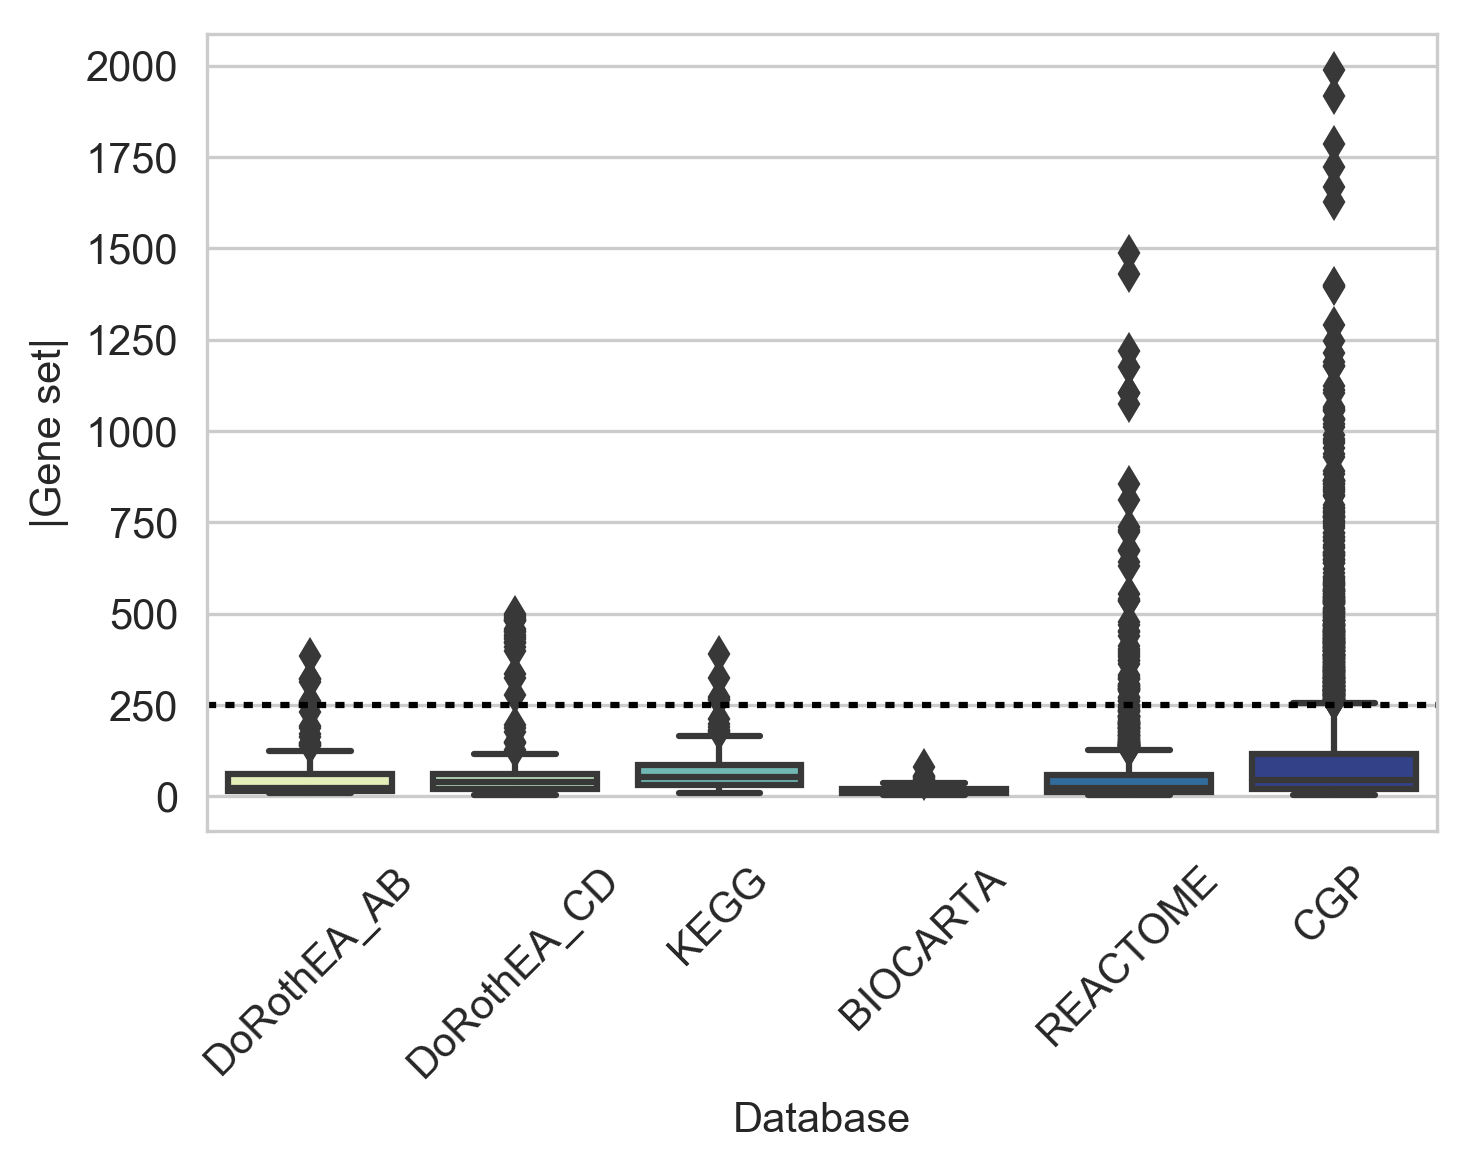

In [8]:
sns.set_palette('YlGnBu',6)
plt.figure(figsize=(5,4),dpi=300)
sns.boxplot(y='Set',x='Database',data=gene_set_sizes)
plt.plot([-0.5,5.5],[250,250],':k')
plt.ylabel('|Gene set|')
plt.xticks(range(6),['DoRothEA_AB','DoRothEA_CD','KEGG','BIOCARTA','REACTOME','CGP'],rotation=45)
plt.tight_layout()

Gene set similarity

Gene set similarity distribution

In [25]:
dname1='BEST_dorothea_AB'
metric='jaccard'

In [26]:
similarities=pd.DataFrame(columns=['Database','Similarity','Random'])
for dname2 in ['KEGG','BIOCARTA','REACTOME','CGP']:
    #readl
    data=pd.read_csv('../results/similarity/%s_filtered_%s_filtered_%s.csv' % (dname1,dname2,metric),
                     sep=',',header=0,index_col=0)
    data=data.max(1).values
    max_sim1=pd.DataFrame(index=range(len(data)),columns=similarities.columns)
    max_sim1['Database']=dname2
    max_sim1['Similarity']=data
    max_sim1['Random']='Real'
    similarities=pd.concat([similarities,max_sim1])
    #random
    data=pd.read_csv('../results/similarity/%s_filtered_%s_random_%s.csv' % (dname1,dname2,metric),
                     sep=',',header=0,index_col=0)
    data=data.max(1).values
    max_sim2=pd.DataFrame(index=range(len(data)),columns=similarities.columns)
    max_sim2['Database']=dname2
    max_sim2['Similarity']=data
    max_sim2['Random']='Random'
    similarities=pd.concat([similarities,max_sim2])
    
    print(dname1,dname2,mwu(max_sim1['Similarity'],max_sim2['Similarity']))
    

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=3598.5, pvalue=2.460750501034517e-07)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=3998.5, pvalue=1.5168970331225855e-05)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=1168.5, pvalue=5.959597276020933e-25)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=343.5, pvalue=1.393381537148282e-33)


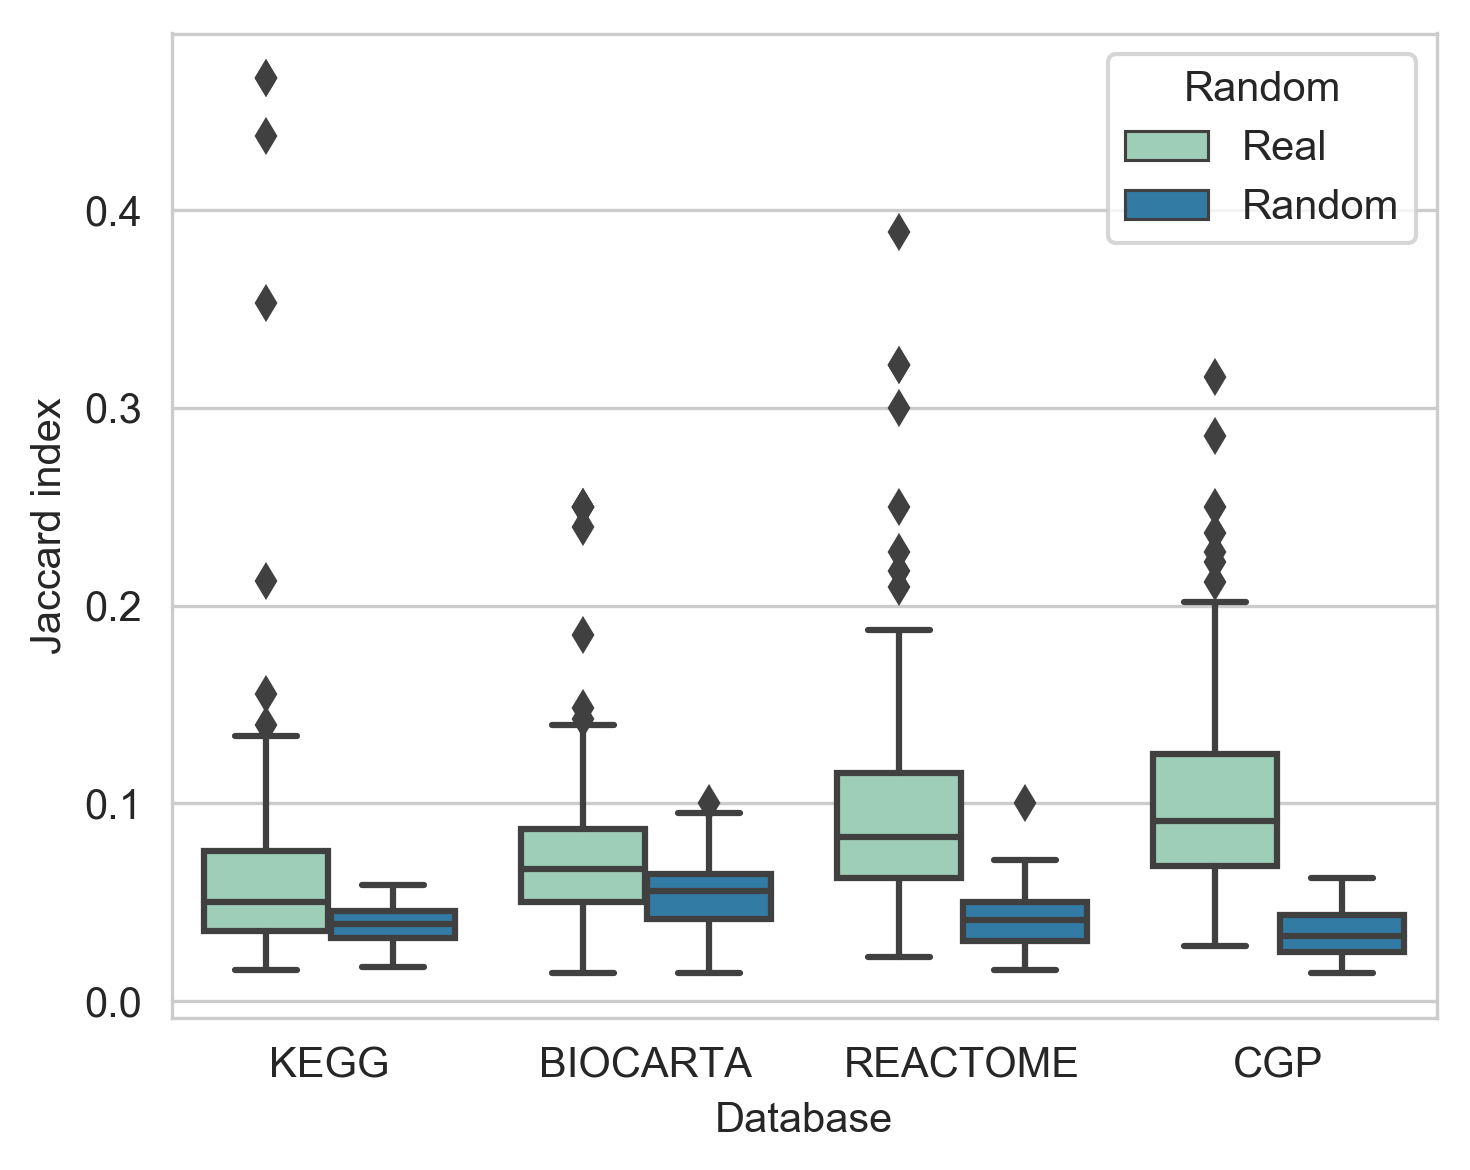

In [27]:
sns.set_palette('YlGnBu',2)
plt.figure(figsize=(5,4),dpi=300)
sns.boxplot(x='Database',y='Similarity',hue='Random',data=similarities,)
if metric=='jaccard':
    plt.ylabel('Jaccard index')
else:
    plt.ylabel('Overlap coefficient')
plt.tight_layout()